## Model Tuning

#### Choose the Model and Define Hyperparameters

##### Selected machine learning algorithm is Gradient Boosting. <br>


#### Hyperparameter Tuning

#### Load the saved model

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import joblib
import random
import os

In [15]:
# Load saved model
best_model = joblib.load('best_model.pkl')

print(type(best_model))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


#### Data Loading and Preparation

In [25]:
# Base directory and file pattern
base_dir = 'D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/'
file_pattern = 'combined_data_{i}_{j}.csv'

# Define available file counts
p = 46  # total number of files in class 0
q = 8   # total number of files in class 2 

# Create a list of numbers from 1 to x with step height 1 for selection of dataset 
m = list(range(1, p))
n = list(range(1, q))

# Randomly select one number from each list as part of file name format
temp1 = random.choice(m)
temp2 = random.choice(n)

# Generate the file path
file_path = os.path.join(base_dir, file_pattern.format(i=temp1, j=temp2))
print(file_path)

data = pd.read_csv(file_path)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/combined_data_20_7.csv


In [26]:

print(data.columns)


Index(['Diabetes_012', 'PhysHlth', 'DiffWalk', 'HighBP', 'GenHlth', 'Age',
       'HighChol', 'Income', 'Education', 'Sex', 'HeartDiseaseorAttack'],
      dtype='object')


#### Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on test set: {accuracy}")


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}
''' 'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],'''

# Initialize the Gradient Boosting Classifier
gb = best_model

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")


Best hyperparameters: {'n_estimators': 200, 'subsample': 1.0}


#### Check the performance of tuned classifier against default classifier

The evaluation is done through parameters -- <br>
1. Evaluation Metrics  
2. Hyperparameter Sensitivity Analysis  
3. Compare Against Baseline Models  
4. Learning Curve Analysis  

Evaluation Metrics of the Default Model:
Accuracy: 0.5120643431635389
Precision: 0.5049163389887845
Recall: 0.5120643431635389
F1 Score: 0.5039712962895482
AUC-ROC: 0.7023706728280653

Hyperparameter Sensitivity Analysis for Default Model:


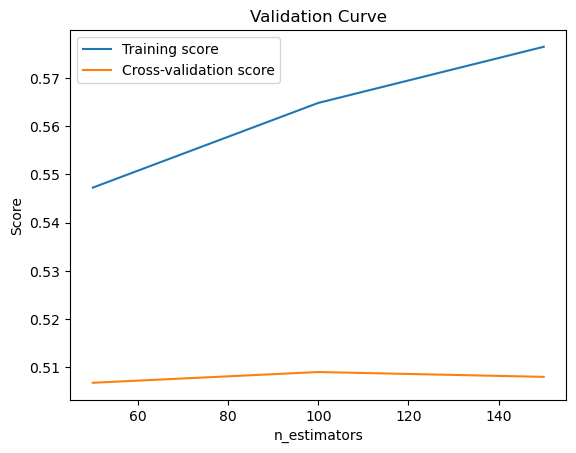


Baseline Model Comparison for Default Model:


C:\Users\Soumiz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Dummy                0.329312   0.108446  0.329312  0.163162  0.500000
Logistic Regression  0.510277   0.497501  0.510277  0.498406  0.695709
Random Forest        0.482127   0.476760  0.482127  0.478768  0.666445

Learning Curve Analysis for Default Model:


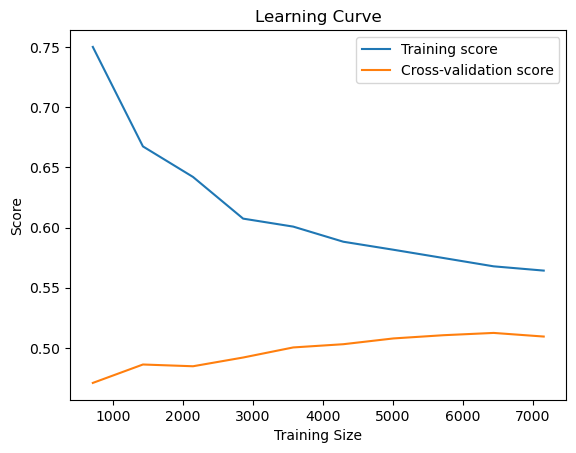


Evaluation Metrics of the Tuned Model:
Accuracy: 0.5125111706881144
Precision: 0.5053499027301157
Recall: 0.5125111706881144
F1 Score: 0.5043299358273519
AUC-ROC: 0.7024764485168378

Hyperparameter Sensitivity Analysis for Tuned Model:


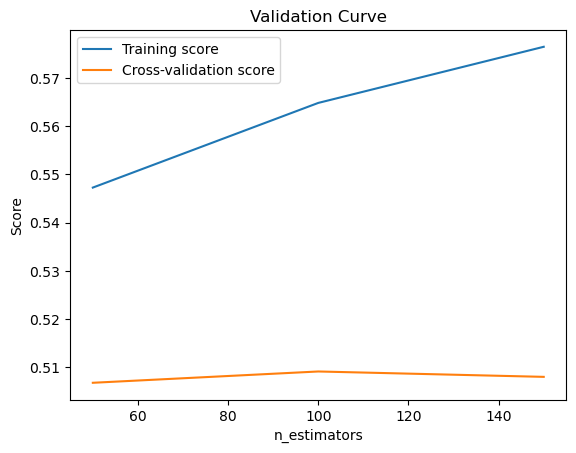


Baseline Model Comparison for Tuned Model:


C:\Users\Soumiz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Dummy                0.329312   0.108446  0.329312  0.163162  0.500000
Logistic Regression  0.510277   0.497501  0.510277  0.498406  0.695709
Random Forest        0.479446   0.473877  0.479446  0.475584  0.665258

Learning Curve Analysis for Tuned Model:


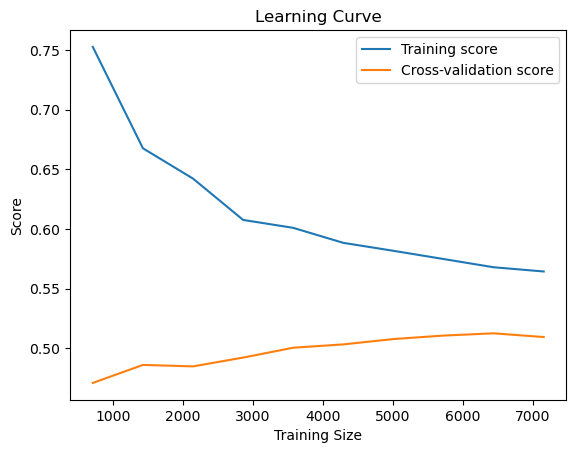

The tuned model may require further tuning.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import joblib
import random
import os

# Load the data

# Base directory and file pattern
base_dir = 'D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/'
file_pattern = 'combined_data_{i}_{j}.csv'

# Define available file counts
p = 46 # total number of files in class 0
q = 8   # total number of files in class 2 

# Create a list of numbers from 1 to x with step height 1 for selection of dataset 
m = list(range(1, p))
n = list(range(1, q))

# Randomly select one number from each list as part of file name format
temp1 = random.choice(m)
temp2 = random.choice(n)

# Generate the file path
file_path = os.path.join(base_dir, file_pattern.format(i=temp1, j=temp2))

data = pd.read_csv(file_path)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, y_pred_prob, multi_class='ovr') if y_pred_prob is not None else None
    }
    
    return metrics

def plot_validation_curve(model, param_name, param_range, X_train, y_train):
    train_scores, test_scores = validation_curve(
        model, X_train, y_train, param_name=param_name, param_range=param_range, cv=5, scoring='accuracy')

    plt.figure()
    plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend()
    plt.show()

def compare_baseline_models(X_train, X_test, y_train, y_test):
    baseline_models = {
        'Dummy': DummyClassifier(strategy='most_frequent'),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    baseline_results = {}
    for name, model in baseline_models.items():
        baseline_results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

    print("Baseline Model Comparison:")
    baseline_results_df = pd.DataFrame(baseline_results).T
    print(baseline_results_df)

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# 1st Run: Default GradientBoostingClassifier
default_model = GradientBoostingClassifier()

print("Evaluation Metrics of the Default Model:")
default_metrics = evaluate_model(default_model, X_train, X_test, y_train, y_test)
for metric, value in default_metrics.items():
    print(f"{metric}: {value}")

print("\nHyperparameter Sensitivity Analysis for Default Model:")
plot_validation_curve(default_model, 'n_estimators', np.arange(50, 200, 50), X_train, y_train)

print("\nBaseline Model Comparison for Default Model:")
compare_baseline_models(X_train, X_test, y_train, y_test)

print("\nLearning Curve Analysis for Default Model:")
plot_learning_curve(default_model, X_train, y_train)

# 2nd Run: Tuned Model
tuned_model = joblib.load('best_model.pkl')

print("\nEvaluation Metrics of the Tuned Model:")
tuned_metrics = evaluate_model(tuned_model, X_train, X_test, y_train, y_test)
for metric, value in tuned_metrics.items():
    print(f"{metric}: {value}")

print("\nHyperparameter Sensitivity Analysis for Tuned Model:")
plot_validation_curve(tuned_model, 'n_estimators', np.arange(50, 200, 50), X_train, y_train)

print("\nBaseline Model Comparison for Tuned Model:")
compare_baseline_models(X_train, X_test, y_train, y_test)

print("\nLearning Curve Analysis for Tuned Model:")
plot_learning_curve(tuned_model, X_train, y_train)

# Determine if the model is tuned properly
train_sizes, train_scores, test_scores = learning_curve(tuned_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

if (test_mean[-1] > train_mean[-1] - 0.05) and (test_mean[-1] > 0.8):
    print("The tuned model appears to be tuned properly.")
else:
    print("The tuned model may require further tuning.")


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import roc_auc_score

def tune_hyper_parameters_using_gb(data, pred_list, roc_list, accuracy_list, f1_list, recall_list, precision_list):
    # Extract features and target
    X = data.drop(columns=['Diabetes_012'])
    y = data['Diabetes_012']
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    # Define the parameter grid for GradientBoostingClassifier
    param_grid = {
        'learning_rate': [0.1, 0.05, 0.01],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5]
    }
    
    # Initialize GradientBoostingClassifier
    gb = GradientBoostingClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Retrieve the best model
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    roc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')  # Calculate ROC AUC score
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # For multi-class f1 score
    recall = recall_score(y_test, y_pred, average='weighted')  # For multi-class recall score
    precision = precision_score(y_test, y_pred, average='weighted')  # For multi-class precision score
    
    # Append metrics to respective lists
    pred_list.append(y_pred)
    roc_list.append(roc)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    
    return best_model, y_pred, roc_list, accuracy_list, f1_list, recall_list, precision_list



# Load your dataset
base_dir = 'D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/'
file_pattern = 'combined_data_{i}_{j}.csv'

# Assuming you have a specific i and j selected
i = 1
j = 1
file_path = os.path.join(base_dir, file_pattern.format(i=i, j=j))

data = pd.read_csv(file_path)

# Initialize lists for storing predictions and metrics
pred_list_gb, roc_list_gb, accuracy_list_gb, f1_list_gb, recall_list_gb, precision_list_gb = [], [], [], [], [], []

# Tune hyperparameters and evaluate using GradientBoostingClassifier
best_model_gb, y_pred_gb, roc_list_gb, accuracy_list_gb, f1_list_gb, recall_list_gb, precision_list_gb = \
    tune_hyper_parameters_using_gb(data, pred_list_gb, roc_list_gb, accuracy_list_gb, f1_list_gb, recall_list_gb, precision_list_gb)

# Display results
print("Best Model:", best_model_gb)
print("Evaluation Metrics:")
print("ROC AUC:", roc_list_gb[-1])
print("Accuracy:", accuracy_list_gb[-1])
print("F1 Score:", f1_list_gb[-1])
print("Recall:", recall_list_gb[-1])
print("Precision:", precision_list_gb[-1])


Best Model: GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)
Evaluation Metrics:
ROC AUC: 0.6854289812749809
Accuracy: 0.5084897229669347
F1 Score: 0.504164695958012
Recall: 0.5084897229669347
Precision: 0.5087236293040278


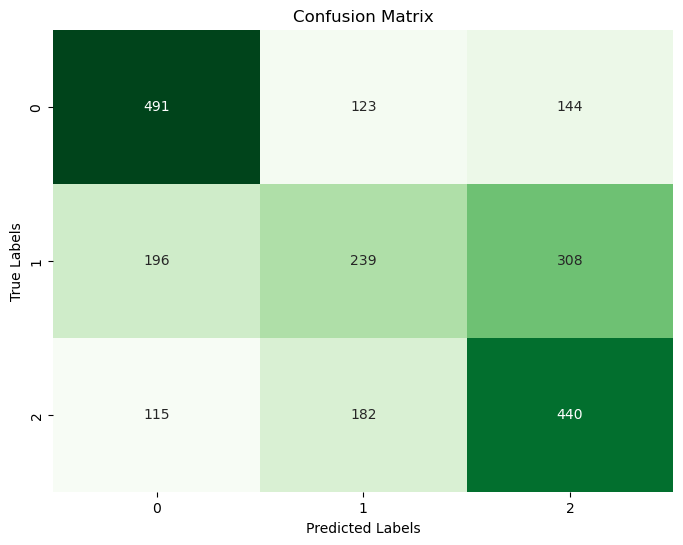

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train your model (assuming you have already trained it)
best_model.fit(X_train, y_train)

# Assuming best_model is already trained and y_pred is predicted values
y_pred = best_model.predict(X_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Evaluation Metrics with Default Parameters:
Accuracy: 0.5053619302949062
Precision: 0.5067347134031939
Recall: 0.5053619302949062
F1 Score: 0.5041458231221619
AUC-ROC: 0.6900696820128869


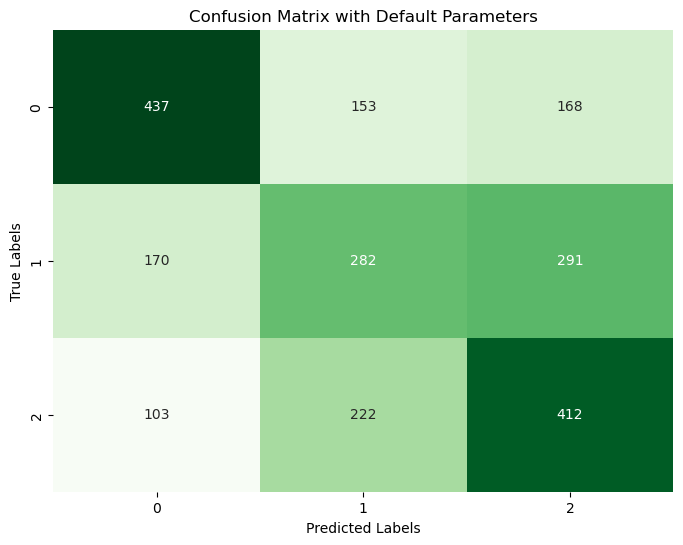

'# Prompt user to change parameters\nprint("\nCurrent Parameters:")\nfor param, value in default_params.items():\n    print(f"{param}: {value}")\n\nnew_params = {}\nfor param in default_params:\n    new_value = input(f"Enter new value for {param} (leave blank to keep {default_params[param]}): ")\n    if new_value != "":\n        if param in [\'ccp_alpha\', \'learning_rate\', \'min_impurity_decrease\', \'min_weight_fraction_leaf\', \'tol\', \'validation_fraction\', \'subsample\']:\n            new_params[param] = float(new_value)\n        elif param in [\'max_depth\', \'max_leaf_nodes\', \'min_samples_leaf\', \'min_samples_split\', \'n_estimators\', \'n_iter_no_change\', \'random_state\', \'verbose\']:\n            new_params[param] = int(new_value)\n        elif param in [\'criterion\', \'init\', \'max_features\']:\n            new_params[param] = new_value\n        elif param in [\'warm_start\']:\n            new_params[param] = new_value.lower() == \'true\'\n    else:\n        new_pa

In [129]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

# Define function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted') if y_pred_proba is not None else None
    }
    
    return y_pred, metrics

data = pd.read_csv('D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/combined_data_37_4.csv')

# Extract features and target
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set default parameters
default_params = {
    'ccp_alpha': 0.0,
    'criterion': 'friedman_mse',
    'init': None,
    'learning_rate': 0.05,
    'loss': 'log_loss',
    'max_depth': 4,
    'max_features': 'log2',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 250,
    'n_iter_no_change': None,
    'random_state': None,
    'subsample': 0.8,
    'tol': 0.0001,
    'validation_fraction': 0.2,
    'verbose': 0,
    'warm_start': False
   
}

# Initialize and train model with default parameters
saved_model = joblib.load('best_model.pkl')

# Update the model's parameters
for param, value in default_params.items():
    setattr(saved_model, param, value)

# Fit the model with the updated parameters
saved_model.fit(X_train, y_train)

# Evaluate model with default parameters
y_pred, metrics = evaluate_model(saved_model, X_test, y_test)

# Print default evaluation metrics
print("Evaluation Metrics with Default Parameters:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Default Parameters')
plt.show()

In [111]:
# Display Model parameters

# Assuming best_model1.get_params() returns a dictionary
params = saved_model.get_params()

print("\n\n \033[1m\033[32mParameters of Model with Best Performance After Tuning\033[0m \n\n")
for key, value in params.items():
    print(f"{key:<30}: {value}")



 Parameters of Model with Best Performance After Tuning 


ccp_alpha                     : 0.0
criterion                     : friedman_mse
init                          : None
learning_rate                 : 0.05
loss                          : log_loss
max_depth                     : 4
max_features                  : log2
max_leaf_nodes                : None
min_impurity_decrease         : 0.0
min_samples_leaf              : 1
min_samples_split             : 2
min_weight_fraction_leaf      : 0.0
n_estimators                  : 250
n_iter_no_change              : None
random_state                  : None
subsample                     : 0.8
tol                           : 0.0001
validation_fraction           : 0.2
verbose                       : 0
warm_start                    : False


In [132]:
conf_matrix


array([[437, 153, 168],
       [170, 282, 291],
       [103, 222, 412]], dtype=int64)

<b> File used: </b> 'D:/Rajesh/Rajesh/Personal/AISanDiego/ProjectDocuments/ProjectReport/CombinedData/combined_data_37_4.csv <br>
<br>
<b>Parameters of Model with Best Performance After Tuning</b>    <br>
    <br>   
ccp_alpha                     : 0.0    <br>
criterion                     : friedman_mse    <br>
init                          : None    <br>
learning_rate                 : 0.05        <br>
loss                          : log_loss    <br>
max_depth                     : 4    <br>
max_features                  : log2    <br>
max_leaf_nodes                : None    <br>
min_impurity_decrease         : 0.0    <br>
min_samples_leaf              : 1    <br>
min_samples_split             : 2    <br>
min_weight_fraction_leaf      : 0.0    <br>
n_estimators                  : 250    <br>
n_iter_no_change              : None    <br>
random_state                  : None    <br>
subsample                     : 0.8    <br>
tol                           : 0.0001    <br>
validation_fraction           : 0.2    <br>
verbose                       : 0    <br>
warm_start                    : False    <br>
<br>
<b>Evaluation Metrics with Default Parameters:</b> <br>
Accuracy: 0.5031277926720286 <br>
Precision: 0.5047153734076412 <br>
Recall: 0.5031277926720286 <br>
F1 Score: 0.5014261022215094 <br>
AUC-ROC: 0.6915339268995365 <br>
 <br>
 
 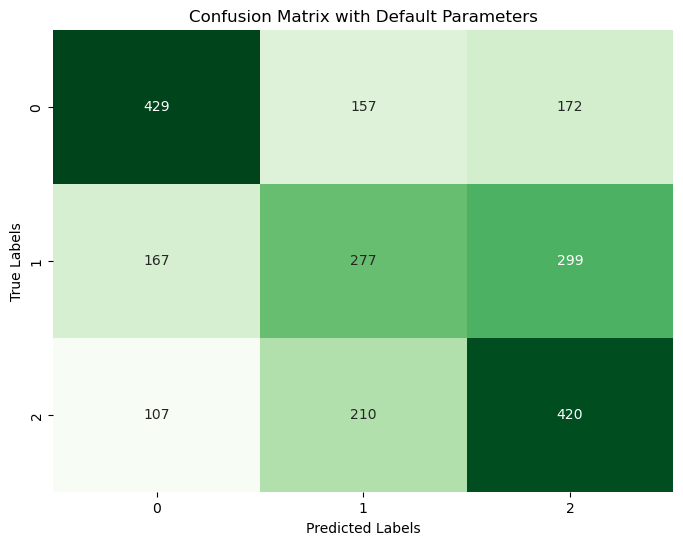

### Check performance with user given parameters

Evaluation Metrics with Default Parameters:
Accuracy: 0.5134048257372654
Precision: 0.5124708308255319
Recall: 0.5134048257372654
F1 Score: 0.5117303238455113
AUC-ROC: 0.7025279292752968


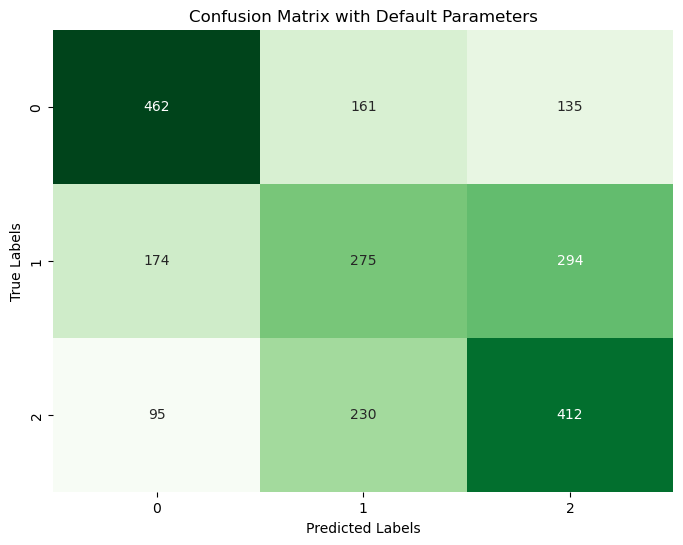

In [105]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

# Define function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted') if y_pred_proba is not None else None
    }
    
    return y_pred, metrics


data = pd.read_csv("C:/Users/Soumiz/Anaconda/USD/Combined Data/combined_data_7_4.csv")   # All evaluation will be done one a specific file

# Extract features and target
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set default parameters
default_params = {
    'ccp_alpha': 0.0,
    'criterion': 'friedman_mse',
    'init': None,
    'learning_rate': 0.05,
    'loss': 'log_loss',
    'max_depth': 4,
    'max_features': 'log2',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 250,
    'n_iter_no_change': None,
    'random_state': None,
    'subsample': 0.8,
    'tol': 0.0001,
    'validation_fraction': 0.2,
    'verbose': 0,
    'warm_start': False
   
}

# Initialize and train model with default parameters
saved_model = joblib.load('best_model.pkl')

# Update the model's parameters
for param, value in default_params.items():
    setattr(saved_model, param, value)

# Fit the model with the updated parameters
saved_model.fit(X_train, y_train)

# Evaluate model with default parameters
y_pred, metrics = evaluate_model(saved_model, X_test, y_test)

# Print default evaluation metrics
print("Evaluation Metrics with Default Parameters:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Default Parameters')
plt.show()


In [95]:

# Display Model parameters
print("\nCurrent Parameters:")
for param, value in default_params.items():
    print(f"{param}: {value}")


Current Parameters:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.05
loss: log_loss
max_depth: 4
max_features: sqrt
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 250
n_iter_no_change: None
random_state: None
subsample: 0.8
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [130]:
better_x_model=saved_model

joblib.dump(better_x_model, 'tuned_final_model.pkl')
print(f"Saved the tuned model to 'tuned_final_model.pkl'")

Saved the tuned model to 'tuned_final_model.pkl'


In [131]:
import joblib

best_model1 = joblib.load('tuned_final_model.pkl')

# Assuming best_model1.get_params() returns a dictionary
params = best_model1.get_params()

print("\n\n \033[1m\033[32mParameters of Model with Best Performance After Tuning\033[0m \n\n")
for key, value in params.items():
    print(f"{key:<30}: {value}")



 Parameters of Model with Best Performance After Tuning 


ccp_alpha                     : 0.0
criterion                     : friedman_mse
init                          : None
learning_rate                 : 0.05
loss                          : log_loss
max_depth                     : 4
max_features                  : log2
max_leaf_nodes                : None
min_impurity_decrease         : 0.0
min_samples_leaf              : 1
min_samples_split             : 2
min_weight_fraction_leaf      : 0.0
n_estimators                  : 250
n_iter_no_change              : None
random_state                  : None
subsample                     : 0.8
tol                           : 0.0001
validation_fraction           : 0.2
verbose                       : 0
warm_start                    : False


In [107]:
import joblib

best_model1 = joblib.load('tuned1_model.pkl')

# Assuming best_model1.get_params() returns a dictionary
params = best_model1.get_params()

print("\n\n \033[1m\033[32mParameters of Model with Best Performance After Tuning\033[0m \n\n")
for key, value in params.items():
    print(f"{key:<30}: {value}")



 Parameters of Model with Best Performance After Tuning 


ccp_alpha                     : 0.0
criterion                     : friedman_mse
init                          : None
learning_rate                 : 0.05
loss                          : log_loss
max_depth                     : 4
max_features                  : log2
max_leaf_nodes                : None
min_impurity_decrease         : 0.0
min_samples_leaf              : 1
min_samples_split             : 2
min_weight_fraction_leaf      : 0.0
n_estimators                  : 250
n_iter_no_change              : None
random_state                  : None
subsample                     : 0.8
tol                           : 0.0001
validation_fraction           : 0.2
verbose                       : 0
warm_start                    : False


In [108]:
import joblib

best_model1 = joblib.load('tuned2_model.pkl')

# Assuming best_model1.get_params() returns a dictionary
params = best_model1.get_params()

print("\n\n \033[1m\033[32mParameters of Model with Best Performance After Tuning\033[0m \n\n")
for key, value in params.items():
    print(f"{key:<30}: {value}")



 Parameters of Model with Best Performance After Tuning 


ccp_alpha                     : 0.0
criterion                     : friedman_mse
init                          : None
learning_rate                 : 0.05
loss                          : log_loss
max_depth                     : 4
max_features                  : sqrt
max_leaf_nodes                : None
min_impurity_decrease         : 0.0
min_samples_leaf              : 1
min_samples_split             : 2
min_weight_fraction_leaf      : 0.0
n_estimators                  : 250
n_iter_no_change              : None
random_state                  : None
subsample                     : 0.8
tol                           : 0.0001
validation_fraction           : 0.2
verbose                       : 0
warm_start                    : False


In [87]:
import joblib

best_model1 = joblib.load('tuned2_model.pkl')

# Assuming best_model1.get_params() returns a dictionary
params = best_model1.get_params()

print("\n\n \033[1m\033[32mParameters of Model with Best Performance After Tuning\033[0m \n\n")
for key, value in params.items():
    print(f"{key:<30}: {value}")



 Parameters of Model with Best Performance After Tuning 


ccp_alpha                     : 0.0
criterion                     : friedman_mse
init                          : None
learning_rate                 : 0.05
loss                          : log_loss
max_depth                     : 4
max_features                  : log2
max_leaf_nodes                : None
min_impurity_decrease         : 0.0
min_samples_leaf              : 1
min_samples_split             : 2
min_weight_fraction_leaf      : 0.0
n_estimators                  : 250
n_iter_no_change              : None
random_state                  : None
subsample                     : 0.8
tol                           : 0.0001
validation_fraction           : 0.2
verbose                       : 0
warm_start                    : False
